In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
# Load the dataset from Google Drive into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PhD_Thesis_Experiments/GitHub_ToChair/FilteredDataSetForExp_002.csv')

In [5]:
df.shape

(108000, 2)

In [6]:
df.head()

,consumer_complaint_narrative,hierarchical_label
0,I am filing a complaint with the CFPB regardin...,CheckingSavings::checkingAccount
1,I was charged overdraft fees because of late p...,CheckingSavings::checkingAccount
2,XX/XX/2024 they withdrew XXXX out my account.....,CheckingSavings::checkingAccount
3,Here 's a revised version of your letter to Al...,CheckingSavings::checkingAccount
4,Attn : XXXX Bank Fraud I was Scam. XX/XX/XXXX ...,CheckingSavings::checkingAccount


In [7]:
hierarchical_label_counts = df['hierarchical_label'].value_counts()
display(hierarchical_label_counts)

,count
hierarchical_label,
CheckingSavings::checkingAccount,2000
CreditCard::general-purposeCreditCardOrChargeCard,2000
CreditReporting::creditReporting,2000
CreditReportingRepair::creditReporting,2000
DebtCollection::creditCardDebt,2000
DebtCollection::iDoNotKnow,2000
DebtCollection::otherDebt,2000
MoneyTransfer::domesticUsMoneyTransfer,2000
MoneyTransfer::mobileOrDigitalWallet,2000


In [8]:
hierarchical_label_counts.shape

(54,)

### Evaluation Metrics: Hierarchical Precision, Hierarchical Recall, Hierarchical F1-score

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Function to split hierarchical labels into product and sub-product
def split_hierarchical_label(label):
    if '::' in label:
        return label.split('::')
    else:
        return [label, 'None'] # Handle cases with no sub-product

# Function to calculate hierarchical metrics
def hierarchical_metrics(y_true, y_pred):
    product_true = [split_hierarchical_label(label)[0] for label in y_true]
    sub_product_true = [split_hierarchical_label(label)[1] for label in y_true]
    product_pred = [split_hierarchical_label(label)[0] for label in y_pred]
    sub_product_pred = [split_hierarchical_label(label)[1] for label in y_pred]

    # Calculate metrics at the product level
    product_precision = precision_score(product_true, product_pred, average='weighted', zero_division=0)
    product_recall = recall_score(product_true, product_pred, average='weighted', zero_division=0)
    product_f1 = f1_score(product_true, product_pred, average='weighted', zero_division=0)

    # Calculate metrics at the sub-product level (only for non-None sub-products)
    # We need to filter for cases where both true and predicted sub-products are not 'None'
    valid_sub_product_true = [sub for i, sub in enumerate(sub_product_true) if sub != 'None' and sub_product_pred[i] != 'None']
    valid_sub_product_pred = [sub for i, sub in enumerate(sub_product_pred) if sub != 'None' and sub_product_true[i] != 'None']


    sub_product_precision = precision_score(valid_sub_product_true, valid_sub_product_pred, average='weighted', zero_division=0) if valid_sub_product_true else 0
    sub_product_recall = recall_score(valid_sub_product_true, valid_sub_product_pred, average='weighted', zero_division=0) if valid_sub_product_true else 0
    sub_product_f1 = f1_score(valid_sub_product_true, valid_sub_product_pred, average='weighted', zero_division=0) if valid_sub_product_true else 0


    # A simple way to combine scores (can be weighted based on importance)
    # Here, we'll just average them
    hierarchical_precision = (product_precision + sub_product_precision) / 2
    hierarchical_recall = (product_recall + sub_product_recall) / 2
    hierarchical_f1 = (product_f1 + sub_product_f1) / 2

    return {
        'product_precision': product_precision,
        'product_recall': product_recall,
        'product_f1': product_f1,
        'sub_product_precision': sub_product_precision,
        'sub_product_recall': sub_product_recall,
        'sub_product_f1': sub_product_f1,
        'hierarchical_precision': hierarchical_precision,
        'hierarchical_recall': hierarchical_recall,
        'hierarchical_f1': hierarchical_f1
    }


### BERT. Epoch 4

In [8]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    get_linear_schedule_with_warmup
)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# ===========================================================
# 1️⃣ Load Data
# ===========================================================
#df = pd.read_csv("complaints.csv")  # change filename if needed
#df = df.dropna(subset=["consumer_complaint_narrative", "hierarchical_label"])

texts = df["consumer_complaint_narrative"].tolist()
labels = df["hierarchical_label"].tolist()

# Label Encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_labels = len(label_encoder.classes_)

# Train-Test Split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, encoded_labels, test_size=0.2, random_state=42
)


In [9]:
# ===========================================================
# 2️⃣ Tokenizer & Dataset
# ===========================================================
MODEL_NAME = "distilbert-base-uncased"
tokenizer = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)

MAX_LEN = 128  # keeps training FAST

class ComplaintDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            padding="max_length",
            truncation=True,
            max_length=MAX_LEN,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

train_dataset = ComplaintDataset(train_texts, train_labels)
val_dataset = ComplaintDataset(val_texts, val_labels)

BATCH_SIZE = 32

train_loader = DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=4, pin_memory=True
)
val_loader = DataLoader(
    val_dataset, batch_size=BATCH_SIZE,
    num_workers=4, pin_memory=True
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [10]:
# ===========================================================
# 3️⃣ Model Initialization
# ===========================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

model = DistilBertForSequenceClassification.from_pretrained(
    MODEL_NAME, num_labels=num_labels
).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
epochs = 4

total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 0, total_steps)

scaler = torch.cuda.amp.GradScaler()

Using: cuda


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3292397109.py:17: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


In [11]:
# ===========================================================
# 4️⃣ Training & Validation Loop
# ===========================================================
best_val_loss = float("inf")
early_stop_patience = 2
no_improve = 0

def train_epoch():
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, leave=False):
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            outputs = model(
                input_ids=batch["input_ids"].to(device),
                attention_mask=batch["attention_mask"].to(device),
                labels=batch["labels"].to(device)
            )
            loss = outputs.loss
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def eval_epoch():
    model.eval()
    total_loss = 0
    preds, truths = [], []
    with torch.no_grad():
        for batch in val_loader:
            with torch.cuda.amp.autocast():
                outputs = model(
                    input_ids=batch["input_ids"].to(device),
                    attention_mask=batch["attention_mask"].to(device),
                    labels=batch["labels"].to(device)
                )
            loss = outputs.loss
            total_loss += loss.item()
            logits = outputs.logits.argmax(dim=-1)
            preds.extend(logits.cpu().numpy())
            truths.extend(batch["labels"].cpu().numpy())
    return total_loss / len(val_loader), preds, truths

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    train_loss = train_epoch()
    val_loss, preds, truths = eval_epoch()
    print(f"Train Loss: {train_loss:.4f}   Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improve = 0
        torch.save(model.state_dict(), "best_distilbert.pt")
    else:
        no_improve += 1
        if no_improve >= early_stop_patience:
            print("Early stopping triggered!")
            break

# Reload best model
model.load_state_dict(torch.load("best_distilbert.pt"))

# Convert predictions to hierarchical labels:
y_true = label_encoder.inverse_transform(truths)
y_pred = label_encoder.inverse_transform(preds)


Epoch 1/4


  0%|          | 0/2700 [00:00<?, ?it/s]

/tmp/ipython-input-2701819142.py:13: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2701819142.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Train Loss: 2.0290   Val Loss: 1.2519

Epoch 2/4


  0%|          | 0/2700 [00:00<?, ?it/s]

Train Loss: 1.0700   Val Loss: 0.9674

Epoch 3/4


  0%|          | 0/2700 [00:00<?, ?it/s]

Train Loss: 0.7831   Val Loss: 0.8711

Epoch 4/4


  0%|          | 0/2700 [00:00<?, ?it/s]

Train Loss: 0.6477   Val Loss: 0.8379


In [12]:
metrics = hierarchical_metrics(y_true, y_pred)
print("\nHierarchical Evaluation:", metrics)


Hierarchical Evaluation: {'product_precision': 0.8717612397393609, 'product_recall': 0.8713888888888889, 'product_f1': 0.8714590893872657, 'sub_product_precision': 0.7611772235063973, 'sub_product_recall': 0.7600462962962963, 'sub_product_f1': 0.7578187648506917, 'hierarchical_precision': 0.8164692316228791, 'hierarchical_recall': 0.8157175925925926, 'hierarchical_f1': 0.8146389271189787}


### BERT. Epoch 10

In [13]:
# ===========================================================
# 3️⃣ Model Initialization
# ===========================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

model = DistilBertForSequenceClassification.from_pretrained(
    MODEL_NAME, num_labels=num_labels
).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
epochs = 10

total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 0, total_steps)

scaler = torch.cuda.amp.GradScaler()

# ===========================================================
# 4️⃣ Training & Validation Loop
# ===========================================================
best_val_loss = float("inf")
early_stop_patience = 2
no_improve = 0

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    train_loss = train_epoch()
    val_loss, preds, truths = eval_epoch()
    print(f"Train Loss: {train_loss:.4f}   Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improve = 0
        torch.save(model.state_dict(), "best_distilbert.pt")
    else:
        no_improve += 1
        if no_improve >= early_stop_patience:
            print("Early stopping triggered!")
            break

# Reload best model
model.load_state_dict(torch.load("best_distilbert.pt"))

# Convert predictions to hierarchical labels:
y_true = label_encoder.inverse_transform(truths)
y_pred = label_encoder.inverse_transform(preds)

metrics = hierarchical_metrics(y_true, y_pred)
print("\nHierarchical Evaluation:", metrics)

Using: cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/10


/tmp/ipython-input-2241764786.py:17: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


  0%|          | 0/2700 [00:00<?, ?it/s]

/tmp/ipython-input-2701819142.py:13: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2701819142.py:33: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Train Loss: 2.0128   Val Loss: 1.2381

Epoch 2/10


  0%|          | 0/2700 [00:00<?, ?it/s]

Train Loss: 1.0221   Val Loss: 0.9231

Epoch 3/10


  0%|          | 0/2700 [00:00<?, ?it/s]

Train Loss: 0.7063   Val Loss: 0.8010

Epoch 4/10


  0%|          | 0/2700 [00:00<?, ?it/s]

Train Loss: 0.5233   Val Loss: 0.7468

Epoch 5/10


  0%|          | 0/2700 [00:00<?, ?it/s]

Train Loss: 0.3928   Val Loss: 0.7214

Epoch 6/10


  0%|          | 0/2700 [00:00<?, ?it/s]

Train Loss: 0.3010   Val Loss: 0.7322

Epoch 7/10


  0%|          | 0/2700 [00:00<?, ?it/s]

Train Loss: 0.2329   Val Loss: 0.7278
Early stopping triggered!

Hierarchical Evaluation: {'product_precision': 0.9008456960578263, 'product_recall': 0.9008333333333334, 'product_f1': 0.9006653920744879, 'sub_product_precision': 0.8161350232984511, 'sub_product_recall': 0.8176388888888889, 'sub_product_f1': 0.8165209535674571, 'hierarchical_precision': 0.8584903596781387, 'hierarchical_recall': 0.8592361111111111, 'hierarchical_f1': 0.8585931728209726}


In [14]:
metrics = hierarchical_metrics(y_true, y_pred)
print("\nHierarchical Evaluation:", metrics)


Hierarchical Evaluation: {'product_precision': 0.9008456960578263, 'product_recall': 0.9008333333333334, 'product_f1': 0.9006653920744879, 'sub_product_precision': 0.8161350232984511, 'sub_product_recall': 0.8176388888888889, 'sub_product_f1': 0.8165209535674571, 'hierarchical_precision': 0.8584903596781387, 'hierarchical_recall': 0.8592361111111111, 'hierarchical_f1': 0.8585931728209726}


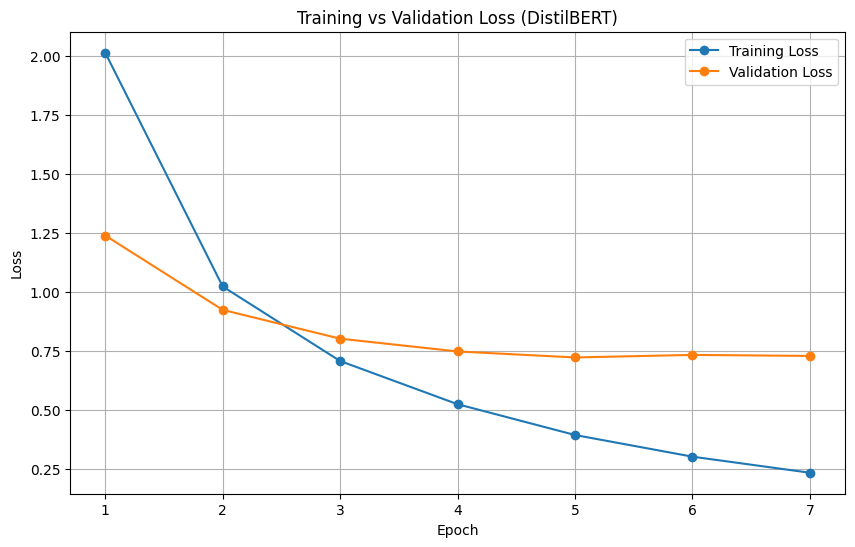

In [19]:
import matplotlib.pyplot as plt

# Static values from your model run
train_losses = [2.0128, 1.0221, 0.7063, 0.5233, 0.3928, 0.3010, 0.2329]
val_losses   = [1.2381, 0.9231, 0.8010, 0.7468, 0.7214, 0.7322, 0.7278]
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, marker='o', label='Training Loss')
plt.plot(epochs, val_losses, marker='o', label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (DistilBERT)")
plt.legend()
plt.grid(True)
plt.show()


### BERT with Anti-Overfitting Enhancements

In [21]:
# ===========================================================
# Model Initialization (Improved Regularization)
# ===========================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

model = DistilBertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=num_labels,
    dropout=0.3,          # ⬆️ Increased dropout
    attention_dropout=0.3
).to(device)

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=2e-5,
    weight_decay=0.01     # ⬆️ L2 regularization
)

epochs = 8   # 🔽 reduce
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 0, total_steps)

scaler = torch.cuda.amp.GradScaler()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


best_val_loss = float("inf")
patience = 2
no_improve = 0

# ===========================================================
# Training & Validation Loop
# ===========================================================
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    model.train()
    correct_train = 0
    total_train = 0
    total_train_loss = 0

    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()

        with torch.amp.autocast("cuda"):
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

        total_train_loss += loss.item()

        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # ⬅️ gradient clipping
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        preds = torch.argmax(logits, dim=1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    train_loss = total_train_loss / len(train_loader)
    train_acc = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # ===== Validation Step =====
    model.eval()
    correct_val = 0
    total_val = 0
    total_val_loss = 0
    preds_all = []
    truths_all = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            with torch.amp.autocast("cuda"):
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                logits = outputs.logits

            total_val_loss += loss.item()
            preds = torch.argmax(logits, dim=1)

            preds_all.extend(preds.cpu().numpy())
            truths_all.extend(labels.cpu().numpy())
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

    val_loss = total_val_loss / len(val_loader)
    val_acc = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train Acc : {train_acc:.4f}, Val Acc : {val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improve = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        no_improve += 1
        if no_improve >= patience:
            print("Early stopping triggered!")
            break

# Reload best weights
model.load_state_dict(torch.load("best_model.pt"))


Using: cuda


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/8


/tmp/ipython-input-750094636.py:24: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Train Loss: 3.2869, Val Loss: 2.5940
Train Acc : 0.1524, Val Acc : 0.2605

Epoch 2/8
Train Loss: 2.2467, Val Loss: 1.9323
Train Acc : 0.3454, Val Acc : 0.4271

Epoch 3/8
Train Loss: 1.8444, Val Loss: 1.6807
Train Acc : 0.4536, Val Acc : 0.5025

Epoch 4/8
Train Loss: 1.6107, Val Loss: 1.4961
Train Acc : 0.5212, Val Acc : 0.5553

Epoch 5/8
Train Loss: 1.4619, Val Loss: 1.4003
Train Acc : 0.5654, Val Acc : 0.5816

Epoch 6/8
Train Loss: 1.3670, Val Loss: 1.3377
Train Acc : 0.5908, Val Acc : 0.5992

Epoch 7/8
Train Loss: 1.3047, Val Loss: 1.3016
Train Acc : 0.6079, Val Acc : 0.6106

Epoch 8/8
Train Loss: 1.2708, Val Loss: 1.2885
Train Acc : 0.6169, Val Acc : 0.6136


<All keys matched successfully>

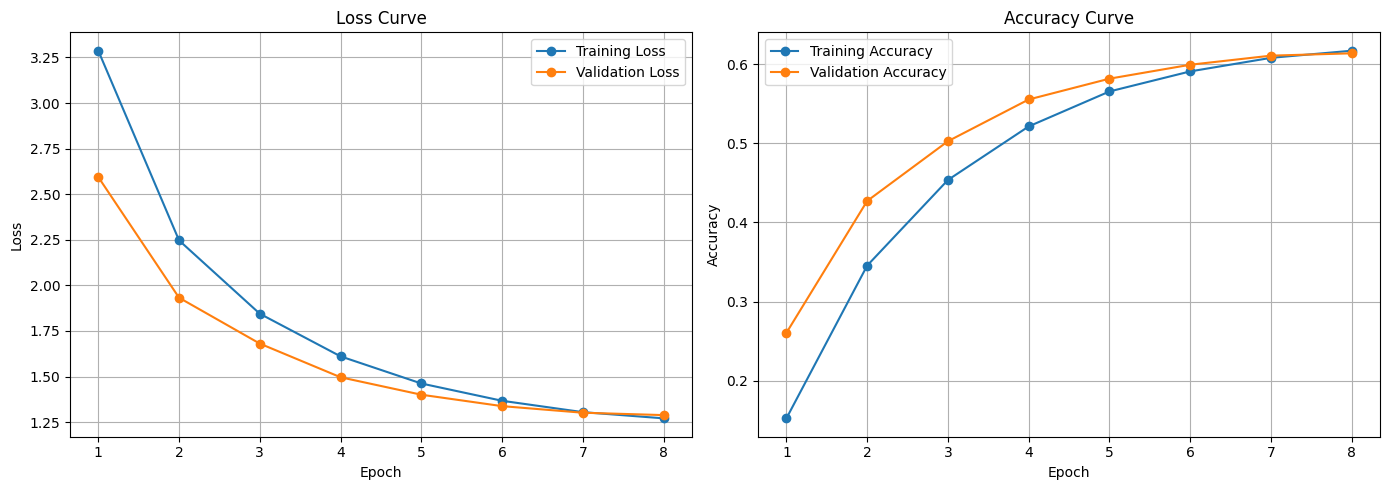

In [22]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(epochs_range, train_losses, marker='o', label="Training Loss")
plt.plot(epochs_range, val_losses, marker='o', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(epochs_range, train_accuracies, marker='o', label="Training Accuracy")
plt.plot(epochs_range, val_accuracies, marker='o', label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [23]:
y_true = label_encoder.inverse_transform(truths_all)
y_pred  = label_encoder.inverse_transform(preds_all)

metrics = hierarchical_metrics(y_true, y_pred)
print("\nHierarchical Evaluation Metrics")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")



Hierarchical Evaluation Metrics
product_precision: 0.8071
product_recall: 0.8015
product_f1: 0.8028
sub_product_precision: 0.6364
sub_product_recall: 0.6320
sub_product_f1: 0.6212
hierarchical_precision: 0.7217
hierarchical_recall: 0.7168
hierarchical_f1: 0.7120


### BERT with Anti-Overfitting Enhancements, Epoch = 10

In [10]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    get_linear_schedule_with_warmup
)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# ===========================================================
# 1️⃣ Load Data
# ===========================================================
#df = pd.read_csv("complaints.csv")  # change filename if needed
#df = df.dropna(subset=["consumer_complaint_narrative", "hierarchical_label"])

texts = df["consumer_complaint_narrative"].tolist()
labels = df["hierarchical_label"].tolist()

# Label Encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_labels = len(label_encoder.classes_)

# Train-Test Split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, encoded_labels, test_size=0.2, random_state=42
)



# ===========================================================
# 2️⃣ Tokenizer & Dataset
# ===========================================================
MODEL_NAME = "distilbert-base-uncased"
tokenizer = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)

MAX_LEN = 128  # keeps training FAST

class ComplaintDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            padding="max_length",
            truncation=True,
            max_length=MAX_LEN,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
        }

train_dataset = ComplaintDataset(train_texts, train_labels)
val_dataset = ComplaintDataset(val_texts, val_labels)

BATCH_SIZE = 32

train_loader = DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=4, pin_memory=True
)
val_loader = DataLoader(
    val_dataset, batch_size=BATCH_SIZE,
    num_workers=4, pin_memory=True
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [11]:
# ===========================================================
# Model Initialization (Improved Regularization)
# ===========================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

model = DistilBertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=num_labels,
    dropout=0.3,          # ⬆️ Increased dropout
    attention_dropout=0.3
).to(device)

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=2e-5,
    weight_decay=0.01     # ⬆️ L2 regularization
)

epochs = 13   # 🔽 reduce
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 0, total_steps)

scaler = torch.cuda.amp.GradScaler()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


best_val_loss = float("inf")
patience = 2
no_improve = 0

# ===========================================================
# Training & Validation Loop
# ===========================================================
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    model.train()
    correct_train = 0
    total_train = 0
    total_train_loss = 0

    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        optimizer.zero_grad()

        with torch.amp.autocast("cuda"):
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

        total_train_loss += loss.item()

        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # ⬅️ gradient clipping
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        preds = torch.argmax(logits, dim=1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    train_loss = total_train_loss / len(train_loader)
    train_acc = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # ===== Validation Step =====
    model.eval()
    correct_val = 0
    total_val = 0
    total_val_loss = 0
    preds_all = []
    truths_all = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            with torch.amp.autocast("cuda"):
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                logits = outputs.logits

            total_val_loss += loss.item()
            preds = torch.argmax(logits, dim=1)

            preds_all.extend(preds.cpu().numpy())
            truths_all.extend(labels.cpu().numpy())
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

    val_loss = total_val_loss / len(val_loader)
    val_acc = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train Acc : {train_acc:.4f}, Val Acc : {val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improve = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        no_improve += 1
        if no_improve >= patience:
            print("Early stopping triggered!")
            break

# Reload best weights
model.load_state_dict(torch.load("best_model.pt"))


Using: cuda


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/13


/tmp/ipython-input-466809499.py:24: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Train Loss: 3.1081, Val Loss: 2.3851
Train Acc : 0.1879, Val Acc : 0.3081

Epoch 2/13
Train Loss: 2.0878, Val Loss: 1.7787
Train Acc : 0.3898, Val Acc : 0.4721

Epoch 3/13
Train Loss: 1.7049, Val Loss: 1.5287
Train Acc : 0.4968, Val Acc : 0.5427

Epoch 4/13
Train Loss: 1.4800, Val Loss: 1.4026
Train Acc : 0.5570, Val Acc : 0.5790

Epoch 5/13
Train Loss: 1.3317, Val Loss: 1.2229
Train Acc : 0.5983, Val Acc : 0.6310

Epoch 6/13
Train Loss: 1.1911, Val Loss: 1.1657
Train Acc : 0.6377, Val Acc : 0.6471

Epoch 7/13
Train Loss: 1.1083, Val Loss: 1.1022
Train Acc : 0.6614, Val Acc : 0.6642

Epoch 8/13
Train Loss: 1.0551, Val Loss: 1.0712
Train Acc : 0.6752, Val Acc : 0.6727

Epoch 9/13
Train Loss: 1.0047, Val Loss: 1.0376
Train Acc : 0.6906, Val Acc : 0.6828

Epoch 10/13
Train Loss: 0.9727, Val Loss: 1.0086
Train Acc : 0.6995, Val Acc : 0.6929

Epoch 11/13
Train Loss: 0.9334, Val Loss: 1.0084
Train Acc : 0.7117, Val Acc : 0.6917

Epoch 12/13
Train Loss: 0.9094, Val Loss: 0.9900
Train Acc : 0.

<All keys matched successfully>

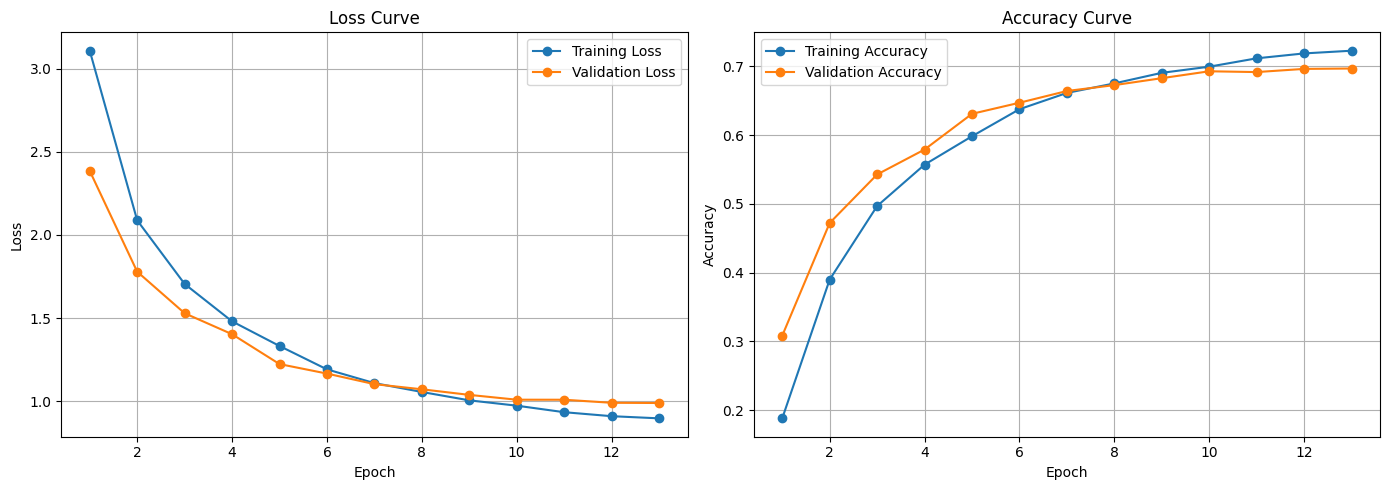

In [12]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(epochs_range, train_losses, marker='o', label="Training Loss")
plt.plot(epochs_range, val_losses, marker='o', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(epochs_range, train_accuracies, marker='o', label="Training Accuracy")
plt.plot(epochs_range, val_accuracies, marker='o', label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [13]:
y_true = label_encoder.inverse_transform(truths_all)
y_pred  = label_encoder.inverse_transform(preds_all)

metrics = hierarchical_metrics(y_true, y_pred)
print("\nHierarchical Evaluation Metrics")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")



Hierarchical Evaluation Metrics
product_precision: 0.8511
product_recall: 0.8465
product_f1: 0.8479
sub_product_precision: 0.7205
sub_product_recall: 0.7117
sub_product_f1: 0.7083
hierarchical_precision: 0.7858
hierarchical_recall: 0.7791
hierarchical_f1: 0.7781
